# Noções básicas de Estatística

A Estatística é um ramo da Matemática que tem um papel fundamental nas pesquisas científicas.

Vamos ver um exemplo onde a Estatística é utilizada.

Este exemplo é de um ramo da Estatística conhecido como **Inferência Estatística**.

Suponha que você queira saber a média das alturas dos brasileiros de 18 anos.

> O que você faria?

Uma maneira direta seria: medir a altura de todos os brasileiros de 18 anos e calcular a média.

> O que você acha disso?

Apesar desta maneira ser matematicamente correta, ela é totalmente inviável.

> Então, o que fazer?

Na prática, é possível trabalhar apenas com uma pequena parte da população. Essa pequena parte é chamada de amostra e iremos calcular a média apenas dessa amostra?

> Mas como saber se o que valor para a média da amostra é próximo da média da população?

Os métodos de Inferência Estatística nos auxiliam a decidir como escolher a amostra para que possamos obter um valor relevante para a média que queremos calcular.

Outro papel fundamental da Estatística é relacionado à descrição de dados. Isso é feito através de cálculos de funções estatísticas (como média, desvio padrão, etc), por representações gráficas, dentre outros.

Nesta unidade, o nosso foco será nessa parte da Estatística.

<hr>

# Média, mediana, quartis, moda


## Média e Mediana

Suponha que você fez uma prova e o professor disponibilizou uma planilha com notas.

Vamos importar a biblioteca e carregar a planilha:

In [ ]:
notas_csv = "5.1 Notas.csv"

f = open(notas_csv, "w", encoding='utf-8')
f.write("""Aluno,Nota
1,40.0
2,45.0
3,20.0
4,35.0
5,30.0
6,25.0
7,30.0
8,90.0
9,100.0
10,90.0
""")
f.close()

In [2]:
import pandas as pd
df = pd.read_csv(notas_csv)
df

NameError: name 'notas_csv' is not defined

> Depois de ver a sua nota (claro :-D), o que você calcula para saber como a turma foi como um todo?

Em geral, calculamos a média. Então acessamos a coluna de notas e calculamos a média.

Para acessar a coluna de notas:

In [ ]:
df["Nota"]

Para calcular a média:

In [ ]:
df["Nota"].mean()

A média é uma **medida de tendência central**.

A partir de medidas de tendência central, tentamos descobrir os valores ***típicos*** dos dados.

> Mas, no nosso caso, você acha que a média que obtivemos descreve bem a nota  "típica"?

Vamos ver a planilha ordenada por nota:

In [ ]:
df.sort_values(by="Nota")

Como você pode ver, temos 7 alunos com nota baixa e 3 alunos com nota muito alta.

Então, a média neste caso não descreve bem o que está acontecendo!

Uma outra medida de tendência central é a **mediana**:

Ela é calculada da seguinte maneira: após ordenarmos os dados

- Se a quantidade de dados for ímpar, a mediana é o valor exatamente na posição do meio.

- Se a quantidade de dados for par, a mediana é a média dos dois valores mais centrais.


Exemplo:
- para (3,4,6) , a mediana é 4
- para (1,2,3,4), a mediana é (2+3)/2 = 2.5

Temos
- $50\%$ dos dados $\leq$ a mediana
- $50\%$ dos dados $\geq$ a mediana.

Vamos calcular a mediana:

In [ ]:
df["Nota"].median()

A mediana neste caso é muito mais baixa que a média!

Então note que a partir da média e da mediana juntas. Podemos deduzir que:

* A maioria dos alunos foi mal
* Uma minoria dos alunos foi muito bem (a ponto de puxar a média para cima)

## Percentis (quartis)

Uma forma mais detalhada para olhar a distribuição de dados são os **percentis**.

Existe mais de uma definição para percentis! Vamos apresentar uma das possibilidades.

Considere um conjunto de valores valores $v_1,v_2,\dotsc,v_{n}$ ordenados do menor para maior e um valor $P$ em $(0,100)$,
o $P$-ésimo **percentil** é o valor na posição $P(n+1)/100$.

Quando o valor posição não é um valor inteiro, o percentil é calculado a partir das posições inteiras mais próximas.

A ideia é calcular uma posição que separe os $P
\%$ menores valores dos maiores

Por exemplo, a ideia é que o $25$ᵒ percentil divida os 25% menores valores dos 75% valores maiores.

Os 25ᵒ, 50ᵒ e 75ᵒ percentis são chamados de quartis.

- O 25ᵒ percentil é chamado de primeiro quartil.
- O 50ᵒ percentil é chamado de segundo quartil.
- O 75ᵒ percentil é chamado de terceiro quartil.

Para calcular os percentis, utilizamos e a função percentile. Veja como ela funciona:

25ᵒ Percentil das notas:

In [ ]:
import numpy as np    # precisamos de biblioteca numpy para calcular Percentil
np.percentile(df["Nota"], q=25)

50ᵒ Percentil das notas:

In [ ]:
np.percentile(df["Nota"],q=50)

75ᵒ Percentil das notas:

In [ ]:
np.percentile(df["Nota"],q=75)

## Moda

As modas de um conjunto de dados são os valores que aparecem com maior frequência.

Ou seja, os valores que estão "na moda".

Para calcular as modas, usamos a função ``mode()``:

In [ ]:
df["Nota"].mode()

Ou seja, as notas que apareceram com maior frequência foram 30 e 90.

OBS: Note que existem conjuntos com uma única moda.

<hr>

# Medidas de dispersão

Em contraste com as medidas que vimos até agora, as medidas de dispersão procuram saber o quão "espalhados" estão os dados e quais são os valores extremos.

> Se você parar para pensar em medidas muito simples para valores extremos, quais seriam elas?

Provavelmente você pensaria no mínimo e máximo.

In [ ]:
df["Nota"].min()

In [ ]:
df["Nota"].max()

A diferença entre o maior valor e o menor valor é chamada de **amplitude**:

In [ ]:
df["Nota"].max()-df["Nota"].min()

Uma medida de dispersão que usamos com frequência é a **variância**.

A variância busca medir a distância dos pontos em relação à média.

Para uma ideia intuitiva: quanto maior é a variância, mais espalhados estão nossos dados.

Por exemplo, se todos os valores são iguais, a variância é 0.


In [ ]:
df["Nota"].var()

A definição de variância calcula as distâncias **ao quadrado** utilizando em relação à média.

Por isso, também olhamos com frequência o valor do **desvio padrão** que é simplesmente a raiz quadrada da variância.

In [ ]:
df["Nota"].std()

O que você pode deduzir sobre as notas a partir do valor desvio padrão obtido; as notas são homogêneas?

Como as medidas que apresentamos são usadas muito frequentemente, existe uma função que as agrega:

In [ ]:
df["Nota"].describe()

<hr>

# Operações nas planilhas

É muito comum que tenhamos que adicionar colunas a uma planilha para fazer os cálculos que desejamos.

Suponha que queiramos criar uma nova coluna com nome "Calcula" e que, para cada aluno, o seu valor seja

$$(-1)^{\text{identificação do aluno}}\cdot (\text{nota do aluno})$$

Note que a nova coluna é automaticamente adicionada:

In [ ]:
df["Calcula"] = (-1)**df["Aluno"]*df["Nota"]
df

<hr>

# Gráficos

Criar gráficos para representar os nossos dados, pode ser muito útil para rapidamente obter informações.

Um gráfico muito simples é o **histograma** que divide os dados em categorias e apresenta quantos valores estão em cada categoria:

In [ ]:
df = pd.read_csv(notas_csv)
df.hist(column="Nota")


Note como a partir dos histogramas, conseguimos rapidamente visualizar a performance dos alunos.

Por padrão são criadas 10 categorias.

No nosso caso, as categorias dividem os valores de 20 (menor nota) a 100 (maior nota) e cada categoria é formada por 8 notas.

Por exemplo, a primeira categoria são as notas de 20 a 28. A segunda até 36 (e assim por diante).

Podemos especificar o número de categorias. Veja um exemplo com apenas 2 categorias:

In [ ]:
df.hist(column="Nota", bins=2)

Outro tipo de gráfico muito usado em Estatística é o box plot.

In [ ]:
df.boxplot(column="Nota")

O box plot apresenta várias informações úteis:
- A linha verde dentro da caixa é a mediana
- A linha inferior da caixa é o primeiro quartil (Q1), ou seja, o 25 percentil.
- A linha superior da caixa é o terceiro quartil (Q3), ou seja, o 75 percentil.
- o traço inferior em preto é o menor valor nos dados que fica acima de $Q1-1.5 IQR$, onde $IQR = Q3-Q1$.
- o traço superior em preto é o maior valor nos dados fica abaixo de
$Q3+1.5 IQR$

O valor IQR é chamado de **amplitude interquartil**.

Pontos abaixo do traço inferior ou acima do traço superior são chamados de **discrepantes**.

No nosso caso, não havia pontos discrepantes. Quando eles existem, são representados por círculos.

Veja um exemplo:



<Axes: >

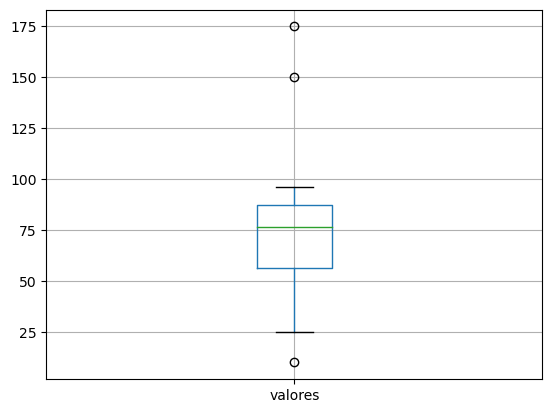

In [3]:
discrepante_csv = "5.1 Discrepante.csv"

f = open(discrepante_csv, "w", encoding='utf-8')
f.write(""",valores
0,74.74751327739251
1,45.202480024227185
2,81.58563530572202
3,56.540163047926065
4,72.09300417499675
5,88.95296084419928
6,56.30132990425508
7,77.94428509054998
8,80.24112218809708
9,96.10717440485048
10,25.0
11,10.0
12,150.0
13,175.0
""")
f.close()

df = pd.read_csv(discrepante_csv)
df.boxplot(column="valores")